## Task-2

Create a program that needs to automatically correct that spelling from the word or a given sentence.

(Language : English) 

Note:  show 100 data point outputs both in words and sentence. 


In [3]:
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungy, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comarisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by echnological theorists ferful of
artifical inteligence run rampant.
'''
#insatiably hungry
#Side comparison

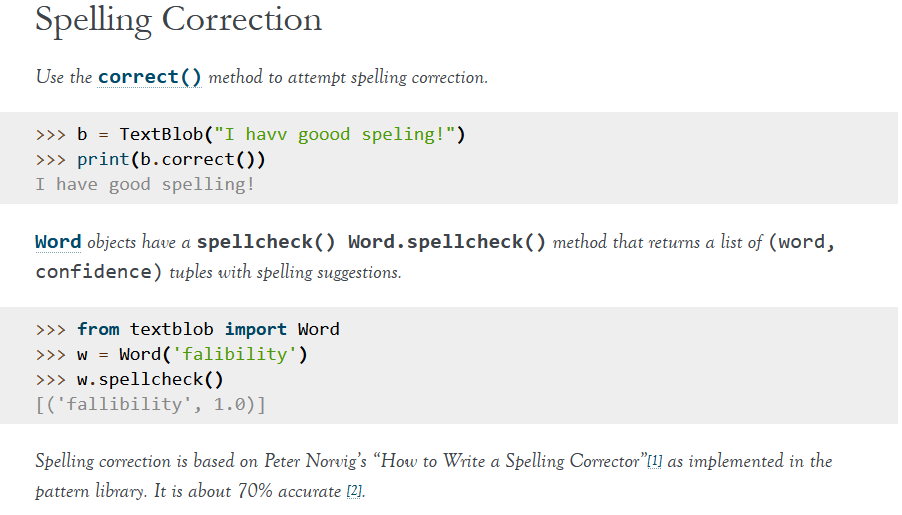

In [4]:
from textblob import TextBlob
zen = TextBlob(text)
print(zen.correct())


The tubular threat of The Low has always struck me as the ultimate movie
monster: an invariably hung, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor willingly
describes it--"assimilating flesh on contact.
Side comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey go scenario
proposed by technological theorists fearful of
artificial intelligence run rampart.



## Method 2
Original work : https://norvig.com/spell-correct.html

In [4]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [5]:
correction('claver')

'clever'

In [8]:
correction('superistitious')

'superstitious'

In [10]:
correction('abominale')

'abominable'